# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Explore data to find some trends and correlations
* Use basic visuals to show these trends in an intuitive way
* Explain how these impact charges


## Inputs

* Dataset: df_transformed.csv

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon_team3\\Hackathon2_project_team3\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon_team3\\Hackathon2_project_team3'

# Basic EDA

Import the necessary libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned dataset from the ETL notebook:

In [5]:
df = pd.read_csv("Dataset/Cleaned/df_transformed.csv")

Exploring the dataset:

In [6]:
df

,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_enc,Smoker_enc,Region_enc
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0
1,18,male,33.770,1,no,southeast,1725.55,1,1,1
2,28,male,33.000,3,no,southeast,4449.46,1,1,1
3,33,male,22.705,0,no,northwest,21984.47,1,1,2
4,32,male,28.880,0,no,northwest,3866.86,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.55,1,1,2
1333,18,female,31.920,0,no,northeast,2205.98,0,1,3
1334,18,female,36.850,0,no,southeast,1629.83,0,1,1
1335,21,female,25.800,0,no,southwest,2007.94,0,1,0


We will check how individual variables are distributed by plotting the distributions of: **Charges, Age, BMI, Children**.
This will ensure we are aware of any irregularities within the data before moving into hypothesis testing:

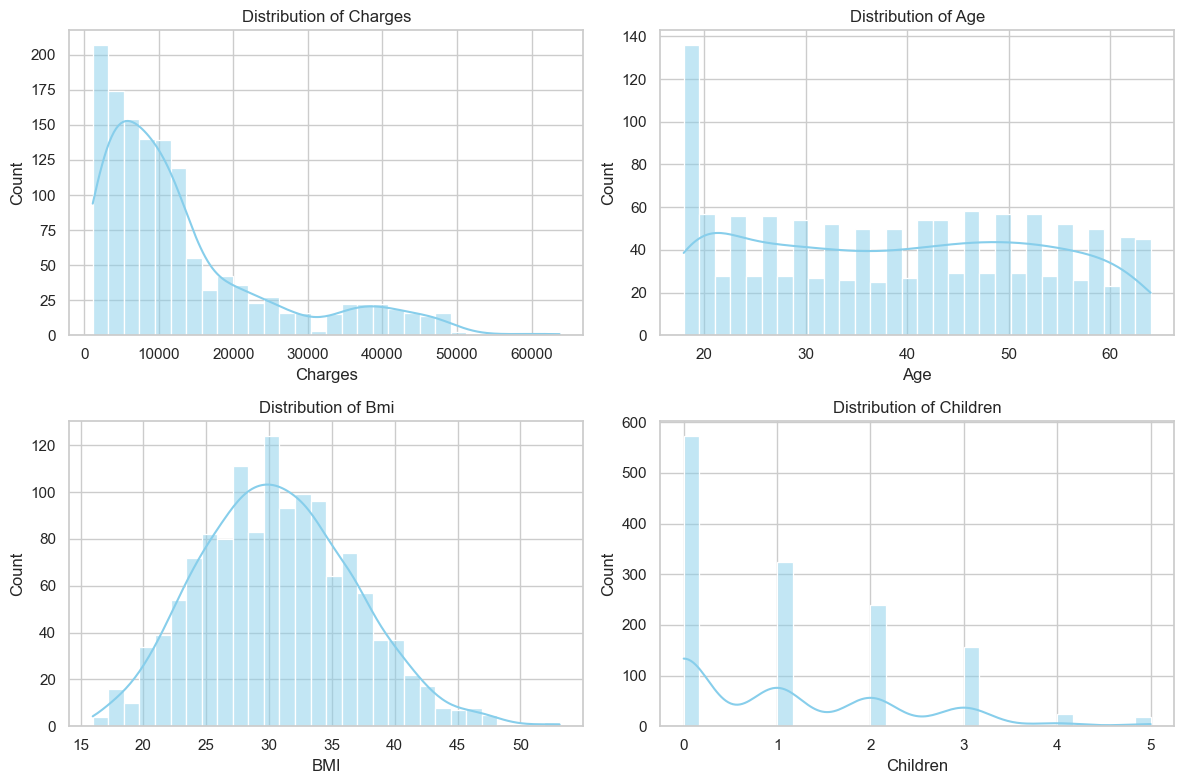

In [31]:
# Numeric columns to explore
cols = ['Charges', 'Age', 'BMI', 'Children']

# Create histograms
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()

Summary:
* The dataset has right-skewness in charges and children
* There are outliers in charges (>40,000) however the "outliers" are being kept due to a chance of them being genuinely high medical costs and may be due to another factor
* The population is mostly young to middle-aged adults, overweight by BMI, and largely childless.
* Overall data is ready for further analysis 

As all the data is ready, we will now compare charges with certain other factors using some basic visualisations. The first is **Charges Vs Smokers:**

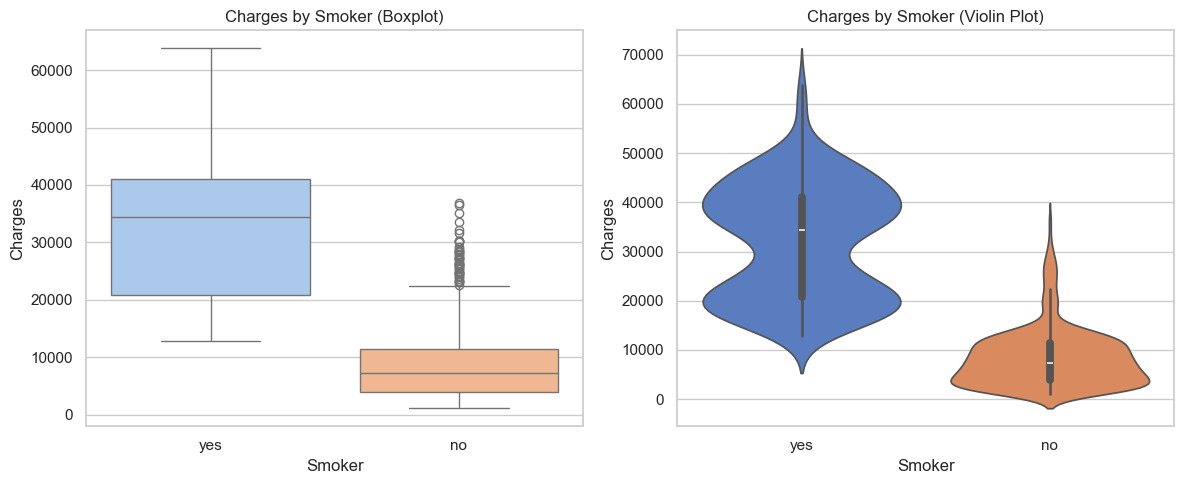

In [30]:
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Smoker', y='Charges', data=df, palette='pastel', hue='Smoker', legend=False)
plt.title('Charges by Smoker (Boxplot)')
plt.ylabel('Charges')
plt.xlabel('Smoker')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Smoker', y='Charges', data=df, palette='muted', hue='Smoker', legend=False)
plt.title('Charges by Smoker (Violin Plot)')
plt.ylabel('Charges')
plt.xlabel('Smoker')

plt.tight_layout()
plt.show()


As expected, the people who smoke have a much higher median and wider range of charges than non-smokers. This could be one of the highest impacts on charges but we will test other factors

The next one is **Charges vs BMI:**

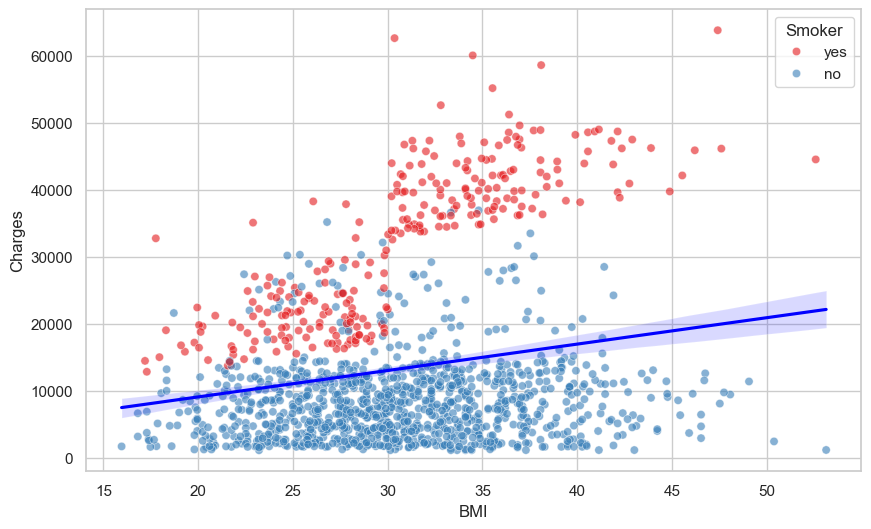

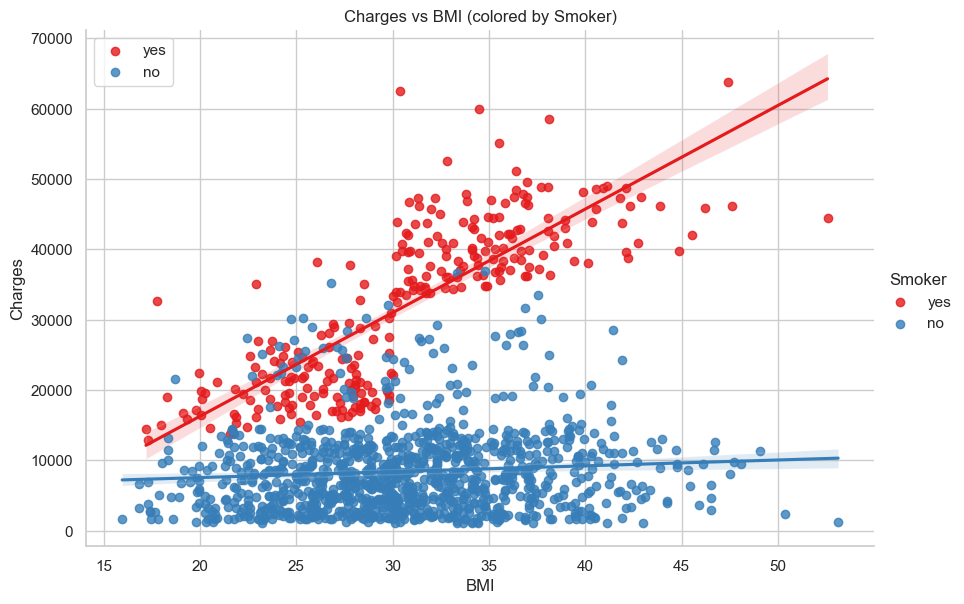

In [29]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line 
sns.scatterplot(x='BMI', y='Charges', hue='Smoker', data=df, palette='Set1', alpha=0.6)

# Regression line for all data
sns.regplot(x='BMI', y='Charges', data=df, scatter=False, color='blue', line_kws={'label':'Regression line'})

# Regression Line for smokers
sns.lmplot(x='BMI', y='Charges', hue='Smoker', data=df, height=6, aspect=1.5, palette='Set1')

plt.title('Charges vs BMI (colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


From this we can see that as BMI increases the charges do as well as shown by the general trendline in the first plot. However the charges of non smokers barely increases the higher the BMI. But in the case of the smokers, their charges significantly increase. Especially when they reach a BMI of >30. This shows that BMI does has a significant impact on charges but mainly for smokers. 

The next one is **Charges vs Age:**

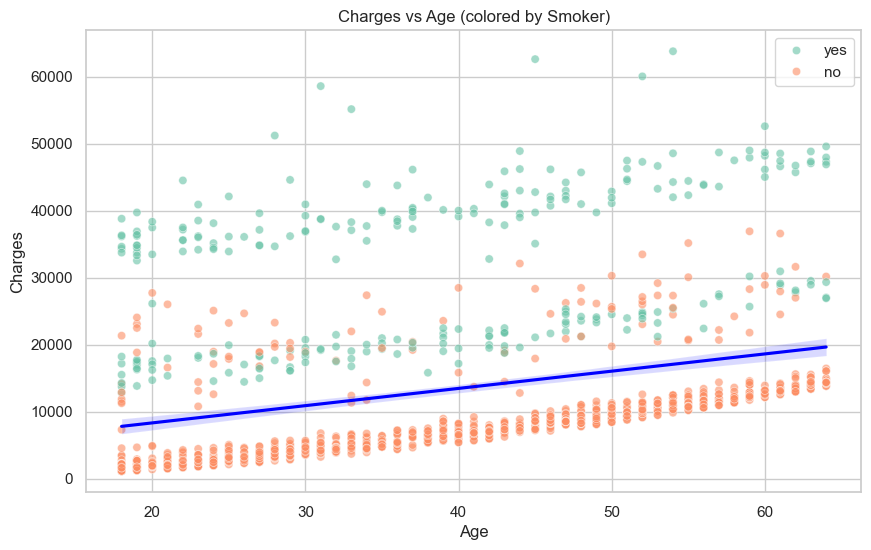

In [28]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(x='Age', y='Charges', hue='Smoker', data=df, palette='Set2', alpha=0.6)

# Regression line for all data
sns.regplot(x='Age', y='Charges', data=df, scatter=False, color='blue', line_kws={'label':'Overall Regression'})

plt.title('Charges vs Age (colored by Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


From this we can see the higher the age, the more the charges are. However it is a steady increase and has some, but not a significant, impact on Charges. As expected the smokers have a higher charge. One thing to point out is that both smokers and non-smokers each have 2 different clusters which shows another factor is at play here. 

The next one is **Charges vs Region:**

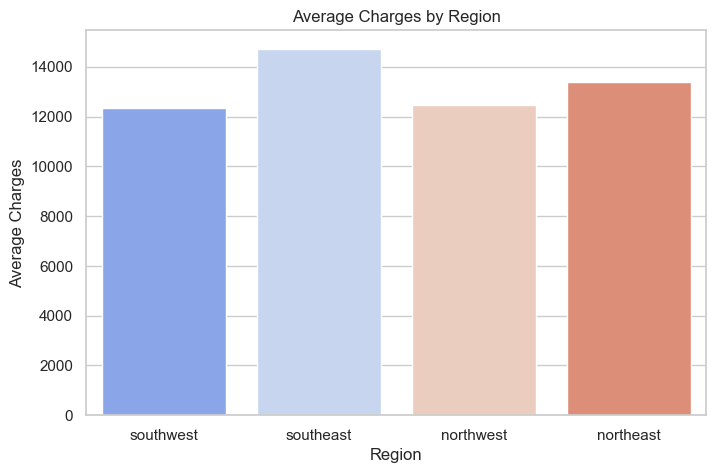

In [33]:
plt.figure(figsize=(8, 5))

# Bar plot of average charges per region
sns.barplot(x='Region', y='Charges', data=df, palette='coolwarm', errorbar=None, hue='Region', legend=False)
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


From the bar plot we can see that Region does seem to have some impact on charges as southeast has charges 2000 more than southwest on average however it is not a significant impact.

The next one is **Charges vs Children:**

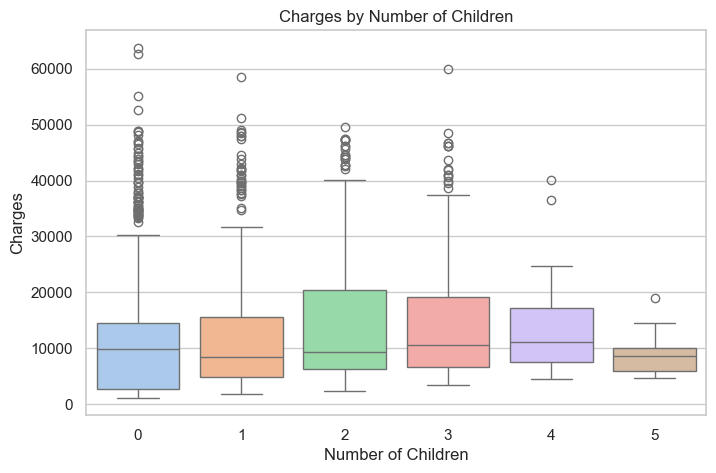

In [38]:
plt.figure(figsize=(8, 5))

# Boxplot of charges grouped by number of children
sns.boxplot(x='Children', y='Charges', data=df, palette='pastel', hue='Children', legend=False)
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


From this plot we can see that there doesn't seem to be a correlation between the charges and number of children. In result the number of children doesnt have an impact on the charges.

Now that we have seen how the individual factors impact charges, we will create a heatmap to show which factors (numerical) create the biggest impact:

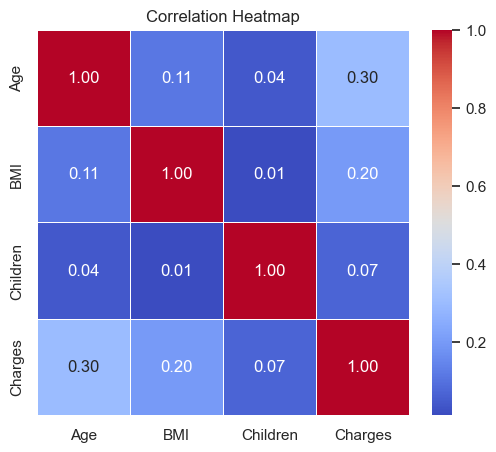

In [42]:
# Select numeric columns
num_cols = ['Age', 'BMI', 'Children', 'Charges']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


From this heatmap we can see that age has the most impact out of the numerical factors. The reason why BMI is not higher despite showing a great impact in the graph above is due to the charges not increasing much for non-smokers as the BMI increases.  

Here is the same heatmap but only including smokers for BMI:

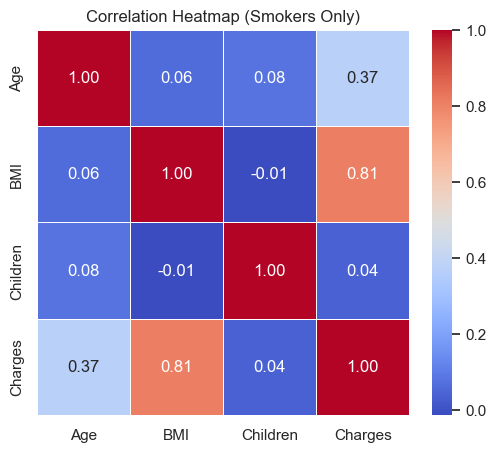

In [44]:
smokers_df = df[df['Smoker'] == 'yes']

num_cols = ['Age', 'BMI', 'Children', 'Charges']

corr_matrix_smokers = smokers_df[num_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix_smokers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Smokers Only)')
plt.show()


As we can see, BMI has increased a lot more showing that people who smoke and have a higher BMI tend to have higher charges.

Now lets visualise multiple factors at once:

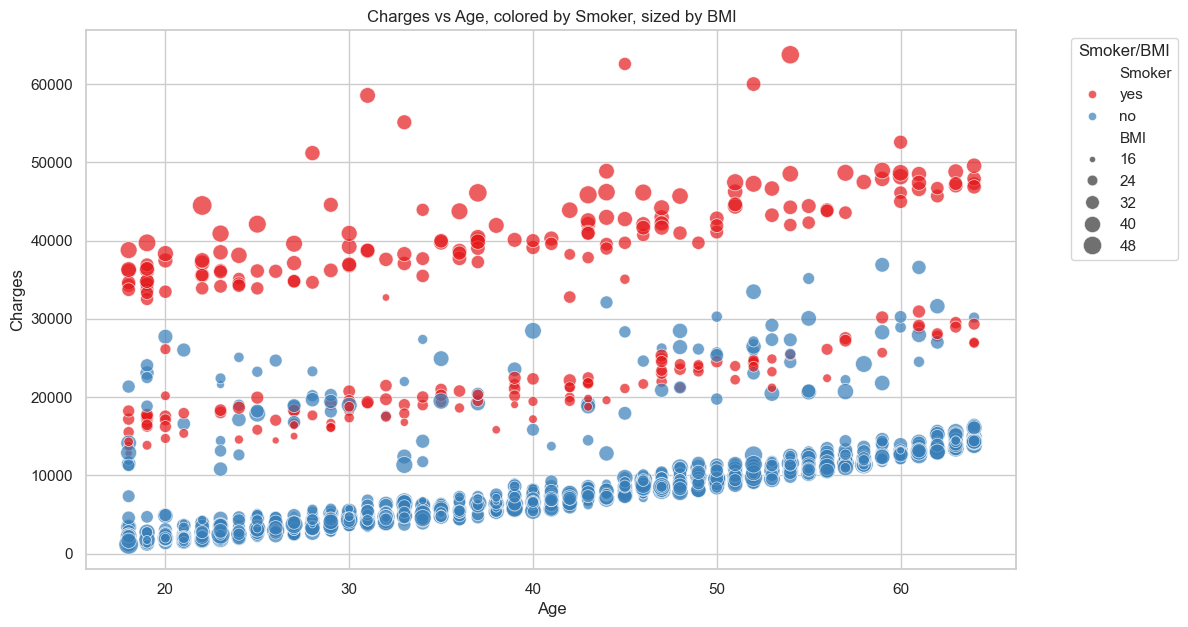

In [46]:
plt.figure(figsize=(12, 7))

# Scatter plot: age vs charges, color=smoker, size=BMI
sns.scatterplot(
    x='Age', 
    y='Charges', 
    hue='Smoker', 
    size='BMI', 
    sizes=(20, 200),  # scale point sizes
    data=df, 
    palette='Set1', 
    alpha=0.7
)

plt.title('Charges vs Age, colored by Smoker, sized by BMI')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker/BMI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


From this plot we can see same trend of 2 distinct clusters for both smokers and and non-smokers. However the size of the dot (BMI) helps us understand why that is. The groups above that are separated from the ones below all seem to have bigger dots (higher BMI) showing that is the cause of the split. 

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
